In [41]:
import pandas as pd
import warnings
import numpy as np
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt
import math


In [2]:
df=pd.read_pickle("combined_outer_data.pkl")

In [3]:
df

,time/date,event,date,time,E-Today(KWH),months,days,years,week,DayOfWeek,IsWeekend,Quarter
0,NaT,NaN,2024-11-16,NaN,8.0,November,Saturday,2024.0,46,5.0,True,4.0
1,NaT,NaN,2024-11-17,NaN,40.0,November,Sunday,2024.0,46,6.0,True,4.0
2,NaT,NaN,2024-11-18,NaN,39.0,November,Monday,2024.0,47,0.0,False,4.0
3,2024-11-19 17:35:06,A1-Grid under voltage,2024-11-19,17:35:06,39.0,November,Tuesday,2024.0,47,1.0,False,4.0
4,2024-11-19 17:35:06,A2-Grid absent,2024-11-19,17:35:06,39.0,November,Tuesday,2024.0,47,1.0,False,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1438,2025-09-07 06:46:46,A0-Grid over voltage,2025-09-07,06:46:46,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN
1439,2025-09-11 12:07:02,A0-Grid over voltage,2025-09-11,12:07:02,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN
1440,2025-09-11 12:02:16,A0-Grid over voltage,2025-09-11,12:02:16,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN
1441,2025-09-11 10:13:39,A0-Grid over voltage,2025-09-11,10:13:39,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1443 entries, 0 to 1442
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   time/date     1281 non-null   datetime64[ns]
 1   event         1281 non-null   object        
 2   date          1443 non-null   datetime64[ns]
 3   time          1281 non-null   object        
 4   E-Today(KWH)  1309 non-null   float64       
 5   months        1309 non-null   object        
 6   days          1309 non-null   object        
 7   years         1309 non-null   float64       
 8   week          1309 non-null   UInt32        
 9   DayOfWeek     1309 non-null   float64       
 10  IsWeekend     1309 non-null   object        
 11  Quarter       1309 non-null   float64       
dtypes: UInt32(1), datetime64[ns](2), float64(4), object(5)
memory usage: 131.2+ KB


In [5]:
df.describe()

,time/date,date,E-Today(KWH),years,week,DayOfWeek,Quarter
count,1281,1443,1309.000000,1309.000000,1309.0,1309.000000,1309.000000
mean,2025-05-09 05:07:28.307572224,2025-05-04 06:04:14.469854464,34.720397,2024.925898,20.34301,2.932009,1.974790
min,2024-11-19 17:35:06,2024-11-16 00:00:00,1.000000,2024.000000,1.0,0.000000,1.000000
25%,2025-03-07 16:25:06,2025-03-04 00:00:00,25.000000,2025.000000,11.0,1.000000,1.000000
50%,2025-05-09 11:24:04,2025-05-01 00:00:00,35.000000,2025.000000,19.0,3.000000,2.000000
75%,2025-07-18 07:57:13,2025-07-17 00:00:00,48.000000,2025.000000,29.0,5.000000,3.000000
max,2025-09-11 12:07:02,2025-09-11 00:00:00,62.000000,2025.000000,52.0,6.000000,4.000000
std,NaN,NaN,14.107323,0.262038,12.089656,1.949466,0.949878


there is no issue after and before joinning the data .data have same information

In [6]:
df["date"].unique()

<DatetimeArray>
['2024-11-16 00:00:00', '2024-11-17 00:00:00', '2024-11-18 00:00:00',
 '2024-11-19 00:00:00', '2024-11-20 00:00:00', '2024-11-21 00:00:00',
 '2024-11-22 00:00:00', '2024-11-23 00:00:00', '2024-11-24 00:00:00',
 '2024-11-25 00:00:00',
 ...
 '2025-08-27 00:00:00', '2025-08-30 00:00:00', '2025-08-31 00:00:00',
 '2025-09-02 00:00:00', '2025-09-03 00:00:00', '2025-09-04 00:00:00',
 '2025-09-05 00:00:00', '2025-09-06 00:00:00', '2025-09-07 00:00:00',
 '2025-09-11 00:00:00']
Length: 294, dtype: datetime64[ns]

there is no issue in date columns .all dates are present

# Missing valuee treatment

In [7]:
df.isnull().sum()

time/date       162
event           162
date              0
time            162
E-Today(KWH)    134
months          134
days            134
years           134
week            134
DayOfWeek       134
IsWeekend       134
Quarter         134
dtype: int64

In [8]:
df["event"].fillna("no fault",inplace=True)

In [9]:
df[df["E-Today(KWH)"].isna()]["date"].unique()

<DatetimeArray>
['2025-08-27 00:00:00', '2025-08-30 00:00:00', '2025-08-31 00:00:00',
 '2025-09-02 00:00:00', '2025-09-03 00:00:00', '2025-09-04 00:00:00',
 '2025-09-05 00:00:00', '2025-09-06 00:00:00', '2025-09-07 00:00:00',
 '2025-09-11 00:00:00']
Length: 10, dtype: datetime64[ns]

In [10]:
df["months"]=df["date"].dt.month_name()
df["days"]=df["date"].dt.day_name()
df["years"]=df["date"].dt.year
df["week"]=df["date"].dt.isocalendar().week
df["DayOfWeek"]=df["date"].dt.weekday
df['IsWeekend'] = df["date"].dt.weekday >= 5
df['Quarter'] = df["date"].dt.quarter

#  Numerical and Categorical variables EDA

In [11]:
df

,time/date,event,date,time,E-Today(KWH),months,days,years,week,DayOfWeek,IsWeekend,Quarter
0,NaT,no fault,2024-11-16,NaN,8.0,November,Saturday,2024,46,5,True,4
1,NaT,no fault,2024-11-17,NaN,40.0,November,Sunday,2024,46,6,True,4
2,NaT,no fault,2024-11-18,NaN,39.0,November,Monday,2024,47,0,False,4
3,2024-11-19 17:35:06,A1-Grid under voltage,2024-11-19,17:35:06,39.0,November,Tuesday,2024,47,1,False,4
4,2024-11-19 17:35:06,A2-Grid absent,2024-11-19,17:35:06,39.0,November,Tuesday,2024,47,1,False,4
...,...,...,...,...,...,...,...,...,...,...,...,...
1438,2025-09-07 06:46:46,A0-Grid over voltage,2025-09-07,06:46:46,NaN,September,Sunday,2025,36,6,True,3
1439,2025-09-11 12:07:02,A0-Grid over voltage,2025-09-11,12:07:02,NaN,September,Thursday,2025,37,3,False,3
1440,2025-09-11 12:02:16,A0-Grid over voltage,2025-09-11,12:02:16,NaN,September,Thursday,2025,37,3,False,3
1441,2025-09-11 10:13:39,A0-Grid over voltage,2025-09-11,10:13:39,NaN,September,Thursday,2025,37,3,False,3


## Events

In [ ]:
1️⃣ A0 – Grid Over Voltage (411 times)

Meaning:
The inverter detected that the incoming grid voltage exceeded the upper safety limit.

Impact:
Inverter stops power export to protect itself.

2️⃣ A2 – Grid Absent (265 times)

Meaning:
The inverter lost grid connection completely.

Impact:
Inverter shuts down because grid reference is missing.

3️⃣ A1 – Grid Under Voltage (242 times)

Meaning:
Grid voltage dropped below the minimum operating limit.

Impact:
Inverter reduces output or disconnects.

4️⃣ A4 – Grid Under Frequency (226 times)

Meaning:
Grid frequency went below standard (50 Hz in Pakistan).

Impact:
Inverter waits until frequency stabilizes.

5️⃣ no fault (162 times)

Meaning:
System running normally.
These logs appear during stable operation.

6️⃣ A3 – Grid Over Frequency (124 times)

Meaning:
Grid frequency exceeded normal upper limit (e.g., 50Hz → 51.5Hz).

Impact:
Inverter disconnects for protection.

7️⃣ A6 – Grid Abnormal (13 times)

Meaning:
General error combining multiple small abnormalities.
Usually appears when:

Voltage fluctuation + frequency shift together

Impact:
Temporary disconnection.

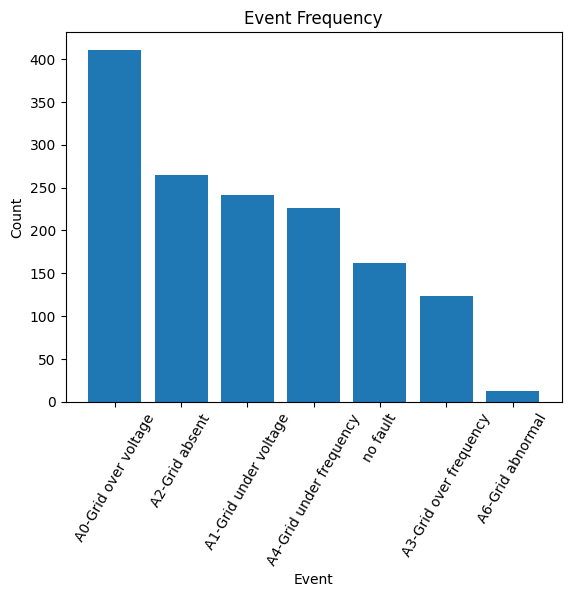

In [33]:
# Get counts
event_counts = df["event"].value_counts().reset_index()
event_counts.columns = ["event", "count"]


plt.bar(event_counts["event"], event_counts["count"])
plt.xlabel("Event")
plt.ylabel("Count")
plt.title("Event Frequency")
plt.xticks(rotation=60) 
plt.show()

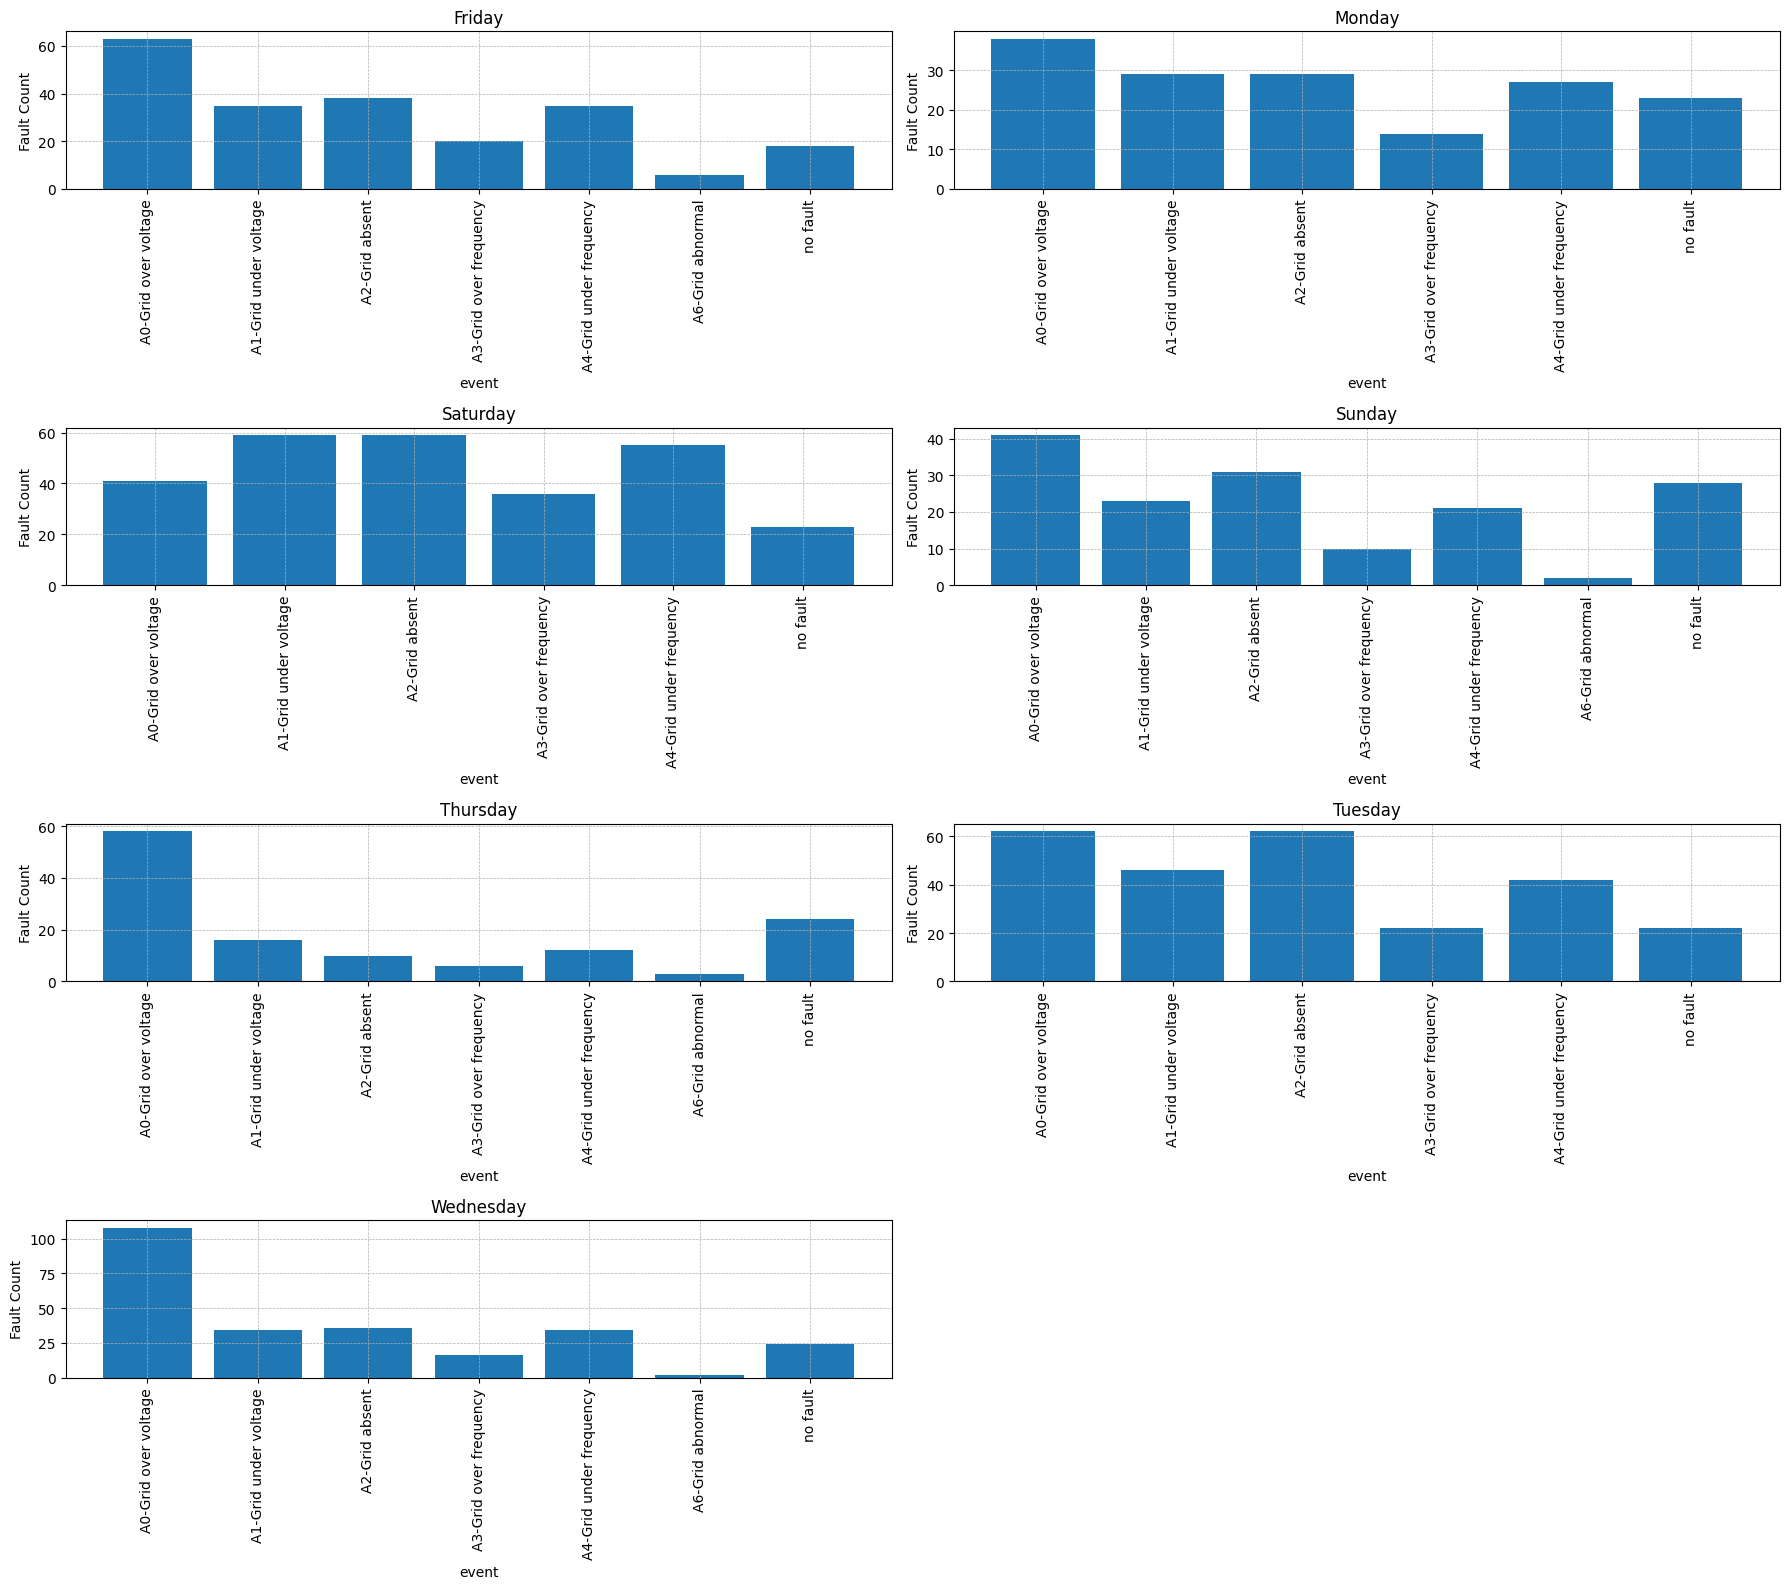

In [47]:
# Get counts
grouped =df.groupby(["days","event"]).size().reset_index(name="fault_count")
days = grouped["days"].unique()
day = len(days)

# number of rows/columns in grid
cols = 2
rows = math.ceil(day / cols)

plt.figure(figsize=(18, rows * 4))

for i, days in enumerate(days, 1):
    event_df = grouped[grouped["days"] == days]

    plt.subplot(rows, cols, i)
    plt.bar(event_df["event"].astype(str), event_df["fault_count"])
    plt.title(days)
    plt.xlabel("event")
    plt.ylabel("Fault Count")
    plt.xticks(rotation=90)
    plt.grid(True, linestyle="--", linewidth=0.5)

plt.tight_layout()
plt.show()


# Identifying outliers

# Discovering relationships between variables